In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
def skin(src):
    '''
    Dest =Src * (1 - Opacity) + (Src + 2 * GuassBlur(EPFFilter(Src) - Src + 128) - 256) * Opacity ;
    '''

    dst = np.zeros_like(src)
    #int value1 = 3, value2 = 1; 磨皮程度与细节程度的确定
    v1 = 3
    v2 = 1
    dx = v1 * 5 # 双边滤波参数之一 
    fc = v1 * 12.5 # 双边滤波参数之一 
    p = 0.1
   
    temp4 = np.zeros_like(src)
    
    temp1 = cv2.bilateralFilter(src,dx,fc,fc)
    temp2 = cv2.subtract(temp1,src)
    temp2 = cv2.add(temp2, (10,10,10,128))
    temp3 = cv2.GaussianBlur(temp2,(2*v2 - 1,2*v2-1),0)
    temp4 = cv2.subtract(cv2.add(cv2.add(temp3, temp3), src), (10, 10, 10, 255))
    
    dst = cv2.addWeighted(src,p,temp4,1-p,0.0)
    dst = cv2.add(dst, (10, 10, 10,255))
    return dst

In [13]:
face_ori = cv2.imread('skin.jpg',1)
face_process = skin(face_ori)

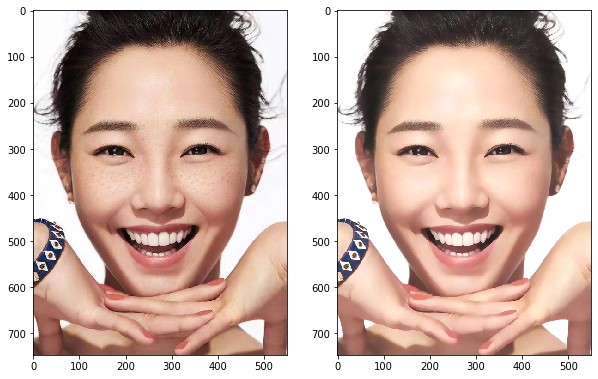

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(face_ori,cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(face_process,cv2.COLOR_BGR2RGB))
plt.show()